In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [132]:
bank = pd.read_csv('bankloan1.csv')
bank.head()

,branch,no_customer,customer,age,eduction_level,employ,address,income,debtinc,creddebt,othdebt,default
0,3,3017,10012,28,High school degree,7,2,44,17.7,2.99,4.80,No
1,3,3017,10017,64,Post-undergraduate degree,34,17,116,14.7,5.05,12.00,No
2,3,3017,10030,40,Did not complete high school,20,12,61,4.8,1.04,1.89,No
3,3,3017,10039,30,Did not complete high school,11,3,27,34.5,1.75,7.56,No
4,3,3017,10069,25,Did not complete high school,2,2,30,22.4,0.76,5.96,Yes


In [133]:
bank1=bank.drop(['branch', 'no_customer', 'customer'],1)

In [134]:
bank1.describe()

,age,employ,address,income,debtinc,creddebt,othdebt
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,34.174000,6.952000,6.305333,59.588667,9.929333,1.934913,3.844327
std,13.142306,8.977644,6.047740,67.130160,6.671884,2.973909,5.333425
min,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.107500
50%,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.215000
75%,42.000000,10.000000,9.000000,64.000000,13.525000,2.200000,4.572500
max,79.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000


In [135]:
bank1.isna().sum()

age               0
eduction_level    0
employ            0
address           0
income            0
debtinc           0
creddebt          0
othdebt           0
default           0
dtype: int64

### distribution of the target variable

In [136]:
bank1.default.value_counts(normalize = True)

No     0.634667
Yes    0.365333
Name: default, dtype: float64

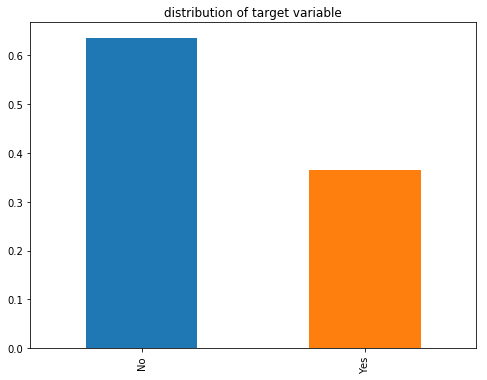

In [137]:
bank1.default.value_counts(normalize = True).plot.bar(figsize = (8, 6), title = 'distribution of target variable')

### Distribution of categorical variable

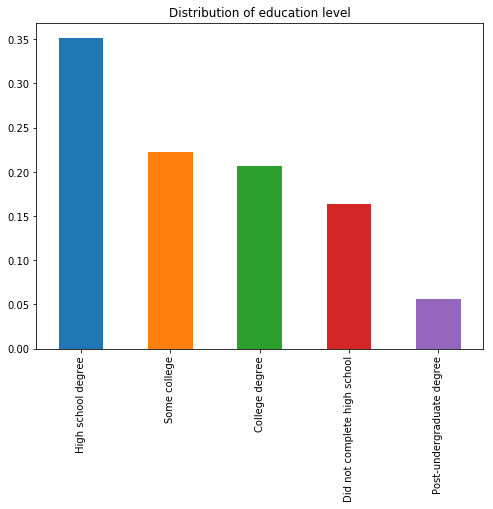

In [138]:
bank1.eduction_level.value_counts(normalize=True).plot.bar(figsize=(8,6), title ='Distribution of education level')

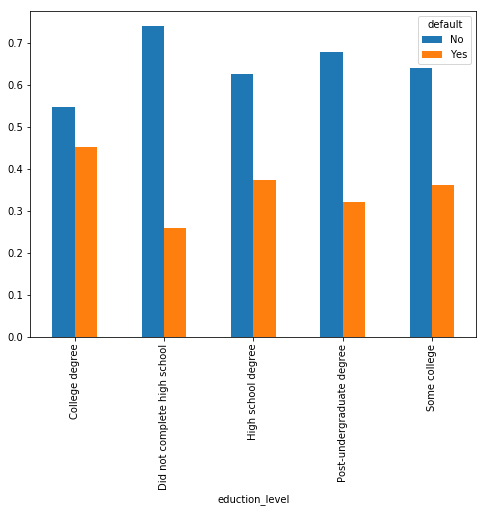

In [139]:
education = pd.crosstab(bank1['eduction_level'], bank1['default'])
education.div(education.sum(1).astype(float), axis=0).plot.bar(figsize=(8,6), stacked=False,)

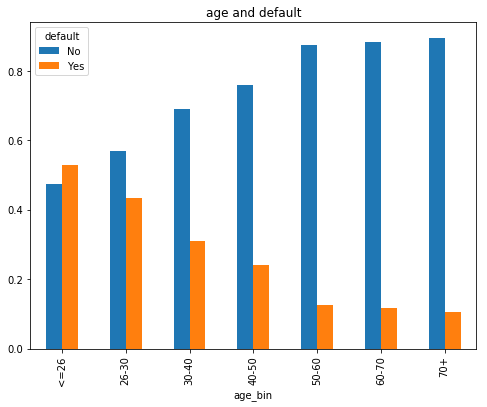

In [140]:
bins = [0,25,30,40,50,60,70,90]
labes = ['<=26','26-30','30-40','40-50','50-60','60-70','70+']
bank1['age_bin'] =pd.cut(bank1['age'],bins,labels=labes)

age_bin = pd.crosstab(bank1.age_bin, bank1.default)
age_bin.div(age_bin.sum(1).astype(float), axis=0).plot.bar(figsize=(8,6), stacked = False, title='age and default')

## univariate scatter plots

In [141]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CFEBAD30>,
      dtype=object)

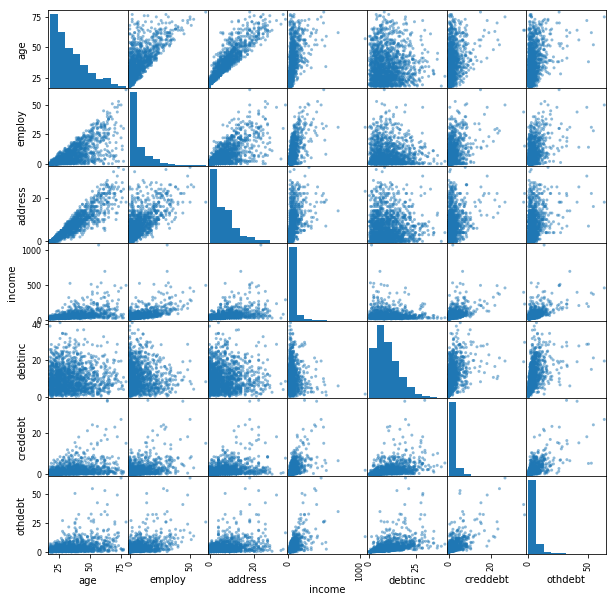

In [142]:
scatter_matrix(bank1, figsize =(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CFEE3080>,
      dtype=object)

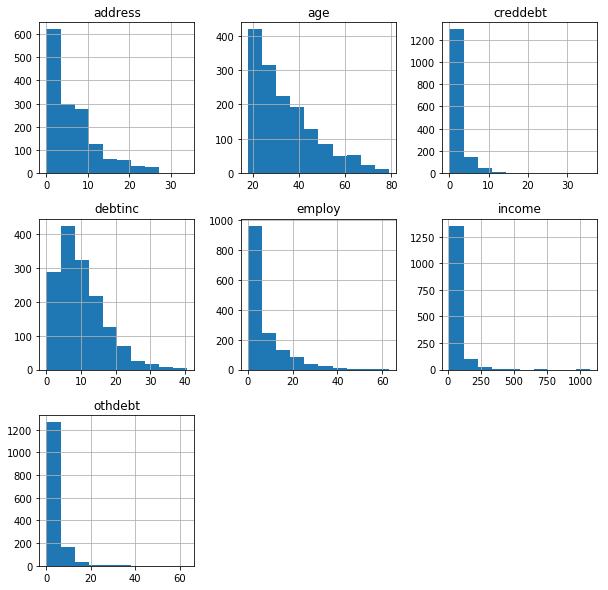

In [143]:
bank1.hist(figsize = (10, 10))

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
employ       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
address      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
income       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
debtinc        AxesSubplot(0.125,0.518913;0.168478x0.16413)
creddebt    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
othdebt     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

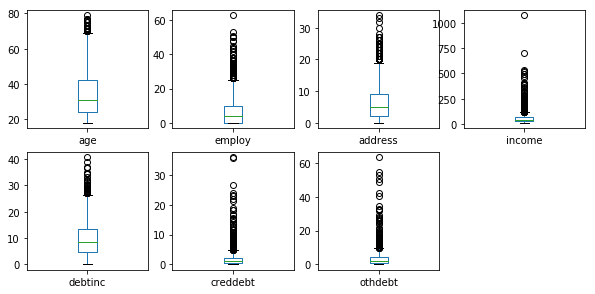

In [144]:
bank1.plot(kind='box', layout = (4,4), subplots = True, sharex=False, figsize=(10,10))

In [145]:
from scipy.stats import zscore

z = np.abs(zscore(bank1[['age','employ','address','income','debtinc','creddebt','othdebt']]))
print(z)

[[0.46993725 0.0053484  0.71212873 ... 1.16507686 0.35489946 0.17924543]
 [2.27022162 3.01382189 1.76896393 ... 0.71527883 1.04782159 1.52967242]
 [0.44344904 1.45387267 0.94193305 ... 0.76905468 0.30102197 0.36655215]
 ...
 [0.69828382 0.77462621 0.54672255 ... 1.00894696 0.55329944 0.67977619]
 [0.0132441  0.33962323 0.28030834 ... 0.68529229 0.25056647 0.16986746]
 [0.54605277 0.55177632 0.71212873 ... 0.619122   0.46247955 0.56348942]]


In [146]:
threshold = 3
print(np.where(z>3))

(array([   1,    3,   40,   71,   86,   94,  103,  103,  105,  105,  113,
        114,  142,  171,  192,  192,  192,  204,  204,  204,  228,  228,
        228,  234,  234,  234,  234,  234,  258,  258,  264,  264,  264,
        292,  297,  299,  320,  338,  338,  342,  356,  359,  360,  392,
        392,  392,  412,  412,  417,  417,  445,  467,  468,  468,  469,
        474,  486,  489,  489,  500,  505,  505,  508,  541,  565,  583,
        586,  607,  608,  608,  609,  609,  617,  617,  620,  620,  620,
        640,  650,  650,  667,  667,  667,  678,  678,  679,  680,  686,
        686,  708,  755,  758,  775,  776,  776,  828,  830,  832,  846,
        862,  871,  872,  923,  939,  939,  939,  939,  939,  958,  960,
        986, 1007, 1013, 1022, 1022, 1080, 1091, 1101, 1101, 1101, 1123,
       1123, 1132, 1132, 1132, 1137, 1157, 1176, 1196, 1196, 1196, 1196,
       1198, 1209, 1212, 1219, 1251, 1265, 1265, 1314, 1314, 1314, 1332,
       1340, 1361, 1398, 1399, 1431, 1431, 1431, 1

## Feature engineering

In [147]:
bank1.default.replace('Yes',1,inplace=True)
bank1.default.replace('No',0,inplace=True)

In [148]:
X= bank1.drop(['age_bin','default'], axis=1)
y = bank1.default

In [149]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [157]:
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [158]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [159]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)])

In [160]:
X.head()

,age,eduction_level,employ,address,income,debtinc,creddebt,othdebt
0,28,High school degree,7,2,44,17.7,2.99,4.80
1,64,Post-undergraduate degree,34,17,116,14.7,5.05,12.00
2,40,Did not complete high school,20,12,61,4.8,1.04,1.89
3,30,Did not complete high school,11,3,27,34.5,1.75,7.56
4,25,Did not complete high school,2,2,30,22.4,0.76,5.96


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [163]:
rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [165]:
print(rf.score(X_train, y_train))
print (rf.score(X_test, y_test))


0.9813333333333333
0.7413333333333333
